Training Data:
[[ 4.3700039   0.99440597]
 [ 1.98890903  3.06467654]
 [-3.6155326   7.8180795 ]
 [ 3.04545118  1.37379466]
 [-0.19453906  7.14702094]
 [-2.40954626  8.51081047]
 [-6.18140388 -6.48662421]
 [ 3.92143461  1.75972253]
 [-7.12680457 -7.56209384]
 [ 2.57243674  1.88404964]
 [-7.04674527 -6.73339591]
 [-6.47137444 -8.5826932 ]
 [-5.67311822 -7.69704526]
 [ 5.03433098  1.5521852 ]
 [-2.70155859  9.31583347]
 [ 4.10937769  1.39735144]
 [-2.44896741 11.47752824]
 [ 5.51100354  1.64714615]
 [-6.71317498 -6.38765833]
 [-2.72886951  9.3713987 ]
 [ 3.31964563  3.80462845]
 [-2.54502366 10.57892978]
 [-5.4974682  -6.23139971]
 [ 2.92674431  3.32704206]
 [ 3.65415279  2.4772162 ]
 [-6.68378194 -7.85848237]
 [-3.39305506  9.16801123]
 [-6.85088237 -5.60165773]
 [-3.33819263  8.45410509]
 [-6.25781723 -8.45033431]
 [-1.6966718  10.37052616]
 [-6.65749342 -7.35885821]
 [-6.85130882 -6.85035345]
 [-4.05986105  9.0828491 ]
 [-6.15795513 -8.00916136]
 [-6.96936289 -5.43999238]
 [-5.94134339

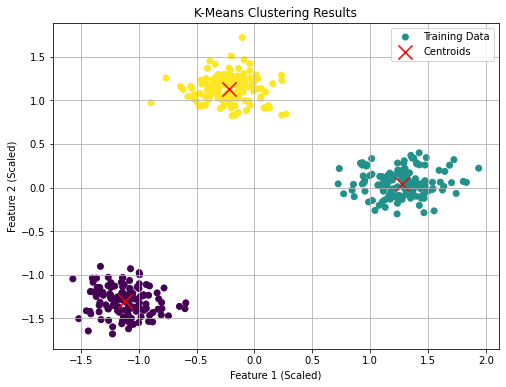

In [1]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X, _ = make_blobs(n_samples=500,centers=3,n_features=2,random_state=42)
X_train, X_test = train_test_split(X,test_size=0.2,random_state=42)
print("Training Data:")
print(X_train)
print("\nTesting Data:")
print(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
kmeans = KMeans(n_clusters=3,max_iter=500,random_state=42)
kmeans.fit(X_train_scaled)
y_pred_train = kmeans.predict(X_train_scaled)
y_pred_test = kmeans.predict(X_test_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_scaled[:, 0],X_train_scaled[:, 1],c=y_pred_train,cmap='viridis',marker='o',label='Training Data')
plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1],c='red',marker='x',s=200,label='Centroids')
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.title("K-Means Clustering Results")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_
mapped_labels = np.zeros_like(kmeans_labels)
for i in range(3):
    mask = (kmeans_labels == i)
    mapped_labels[mask] = np.bincount(y[mask]).argmax()
kmeans_accuracy = accuracy_score(y, mapped_labels)
print("K-Means Accuracy:", kmeans_accuracy)
print("K-Means Confusion Matrix:")
print(confusion_matrix(y, mapped_labels))
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_scaled, y)
y_pred_lr = log_reg.predict(X_scaled)
lr_accuracy = accuracy_score(y, y_pred_lr)
print("\nLogistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y, y_pred_lr))
print("\nModel Comparison")
print("----------------")
print("K-Means Accuracy            :", kmeans_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)


K-Means Accuracy: 0.8333333333333334
K-Means Confusion Matrix:
[[50  0  0]
 [ 0 39 11]
 [ 0 14 36]]

Logistic Regression Accuracy: 0.9733333333333334
Logistic Regression Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Model Comparison
----------------
K-Means Accuracy            : 0.8333333333333334
Logistic Regression Accuracy: 0.9733333333333334
